Download Dataset : https://www.kaggle.com/datasets/edqian/twitter-climate-change-sentiment-dataset?resource=download

Referensi Code Program :  https://www.kaggle.com/datasets/edqian/twitter-climate-change-sentiment-dataset/code

In [ ]:
# Import library yang dibutuhkan
# dokumen bisa diakses melalui referensi kaggle/python docker image: https://github.com/kaggle/docker-python
import numpy as np #linear algebra
import pandas as pd #data processing seperti .csv file

#Pre-Processing Data


*   Membaca dan mengetahui isi dataset dengan library NLP (Data Acquisition)
*   Eksplorasi Dataset (Exploration Data Analysis(EDA))




##DATA AKUISISI

In [ ]:
data = pd.read_csv("/content/twitter_sentiment_data.csv")

In [ ]:
data

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153
...,...,...,...
43938,1,"Dear @realDonaldTrump,\nYeah right. Human Medi...",791307031919550464
43939,1,What will your respective parties do to preven...,791316857403936768
43940,2,RT @MikkiL: UN Poll Shows Climate Change Is th...,791357509101621249
43941,0,RT @taehbeingextra: i still can$q$t believe th...,791390042136641537


In [ ]:
display(data.shape)

(43943, 3)

terdapat 43943 baris dan 3 kolom pada dataset


In [ ]:
# mengetahui nilai pada kolom sentiment
value_counts = data["sentiment"].value_counts()
value_counts.name = "Raw Number"

value_normd = data["sentiment"].value_counts(normalize=True)
value_normd.name = "Percentage"

display(pd.concat([value_counts, value_normd], axis=1))

,Raw Number,Percentage
1,22962,0.522541
2,9276,0.211092
0,7715,0.175568
-1,3990,0.090799


*function* value_counts() mengembalikan pencacahan atas semua nilai unik dan berapa kali nilai itu muncul pada kolom sentiment.

In [ ]:
#menampilkan 5 data teratas dengan function head()
display(data.head())

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


##DATA EKSPLORASI

Sebelum kita menganalisis data kita, mari kita buat salinan pd.DataFrame yang sudah kita prosesing menggunakan beberapa librari diatas sehingga kita dapat memasukkan data tweet ke dalam model kita nanti.

Kita akan mulai Exploratory Data Analysis (EDA). Langkah pertama dari setiap proyek Pembelajaran Mesin adalah mengembangkan pemahaman tentang data Anda, karena hal itu akan membantu pemilihan model nantinya.

In [ ]:
from copy import deepcopy
tweet = deepcopy(data)
from tqdm import tqdm

sekarang, dataset yang sudah kita masukkan kedalam variabel data yang memuat nilai dari dataset sebelumnya, sekarang sudah tercopy kedalam variabel tweet.

In [ ]:
tweet

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153
...,...,...,...
43938,1,"Dear @realDonaldTrump,\nYeah right. Human Medi...",791307031919550464
43939,1,What will your respective parties do to preven...,791316857403936768
43940,2,RT @MikkiL: UN Poll Shows Climate Change Is th...,791357509101621249
43941,0,RT @taehbeingextra: i still can$q$t believe th...,791390042136641537


kita akan mengganti semua nilai numerik dengan label yang kita butuhkan seperti label ", yang diberikan oleh kumpulan data.

In [ ]:
sentiment_num2name = {
    -1: "Negative",
     0: "Neutral",
     1: "Positif",
     2: "News",
}
tweet["sentiment"] = tweet["sentiment"].apply(lambda num: sentiment_num2name[num])
tweet.head()

,sentiment,message,tweetid
0,Negative,@tiniebeany climate change is an interesting h...,792927353886371840
1,Positif,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,Positif,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,Positif,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,News,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


In [ ]:
from matplotlib import pyplot as plt
from matplotlib import style

import seaborn as sns

sns.set(font_scale=1.5)
style.use("seaborn-poster")

<ipython-input-39-abcd684ac157>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use("seaborn-poster")


ValueError: ignored

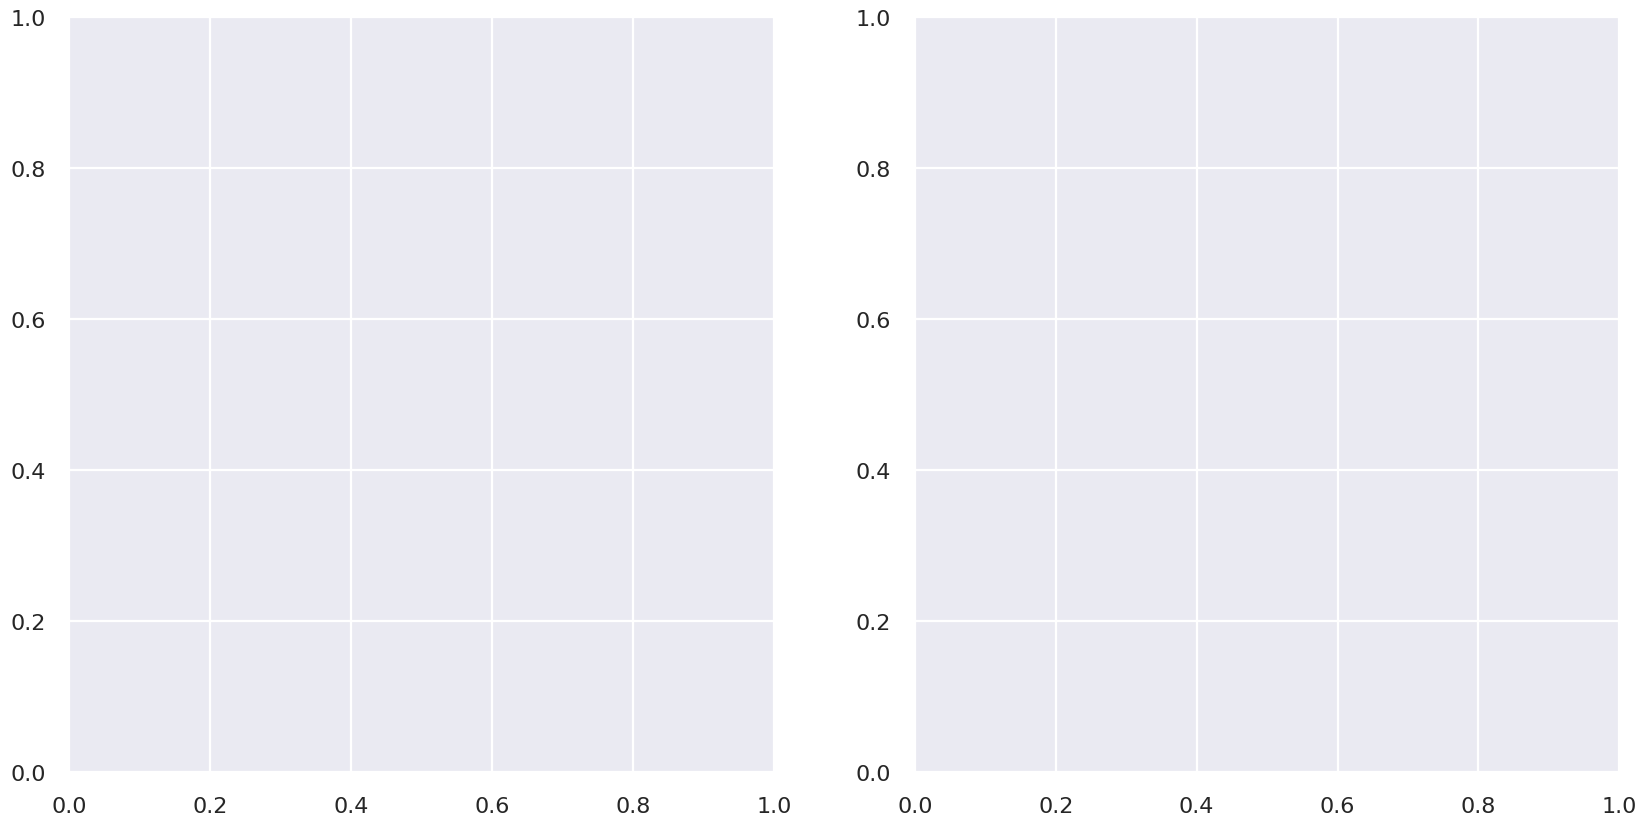

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10), dpi=100)

sns.countplot(tweet["sentiment"], ax=axes[0])
labels = list(sentiment_num2name.values())

axes[1].pie(tweet["sentiment"].value_counts(),
            labels=labels,
            autopct="%1.0f%%",
            startangle=90,
            explode=tuple([0.1] * len(labels)))

fig.suptitle("Distribusi Hasil Tweet", fontsize=20)
plt.show()

Selanjutnya, karena Twitter menggunakan Hashtag hampir seperti fitur ringkasan *"Text Summarization"* (setidaknya dalam arti menyoroti ide inti). Jadi mari kita lihat beberapa tagar teratas untuk setiap kelas sentimen. Kemudian Kita akan membuat *"WordCloud"* untuk memvisualisasikan keunggulan dari masing-masing sentimen.

In [ ]:
import re
import nltk
import itertools

In [ ]:
top15 = {}

by_sentiment = tweet.groupby("sentiment")
for sentiment, group in tqdm(by_sentiment):
    hashtags = group["message"].apply(lambda tweet: re.findall(r"#(\w+)", tweet))
    hashtags = itertools.chain(*hashtags)
    hashtags = [ht.lower() for ht in hashtags]

    frequency = nltk.FreqDist(hashtags)

    df_hashtags = pd.DataFrame({
        "hashtags": list(frequency.keys()),
        "counts": list(frequency.values()),
    })
    top15_htags = df_hashtags.nlargest(15, columns=["counts"])

    top15[sentiment] = top15_htags.reset_index(drop=True)

display(pd.concat(top15, axis=1).head(n=10))

100%|██████████| 4/4 [00:00<00:00, 24.33it/s]


Negative               Neutral                  News         \
        hashtags counts       hashtags counts       hashtags counts   
0           tcot     59        climate     59        climate    330   
1           maga     31  climatechange     51  climatechange    171   
2        climate     25          trump     20           news     80   
3  climatechange     25  globalwarming     18    environment     77   
4          pjnet     23    debatenight     16          trump     49   
5          trump     21          cop21     14        science     42   
6  globalwarming     19         auspol     13  globalwarming     29   
7       fakenews     15          cop22     11          cop22     26   
8             p2     13        science      9             p2     22   
9       teaparty     11           maga      9          cop21     21   

           Positif         
          hashtags counts  
0          climate    541  
1    climatechange    384  
2   beforetheflood    265  
3     actonclimate    156  
4   parisagreement    108  
5  imvotingbecause     93  
6            cop22     86  
7           auspol     76  
8            cop21     73  
9    globalwarming     73

In [ ]:
from matlotlib.pyplot as plt

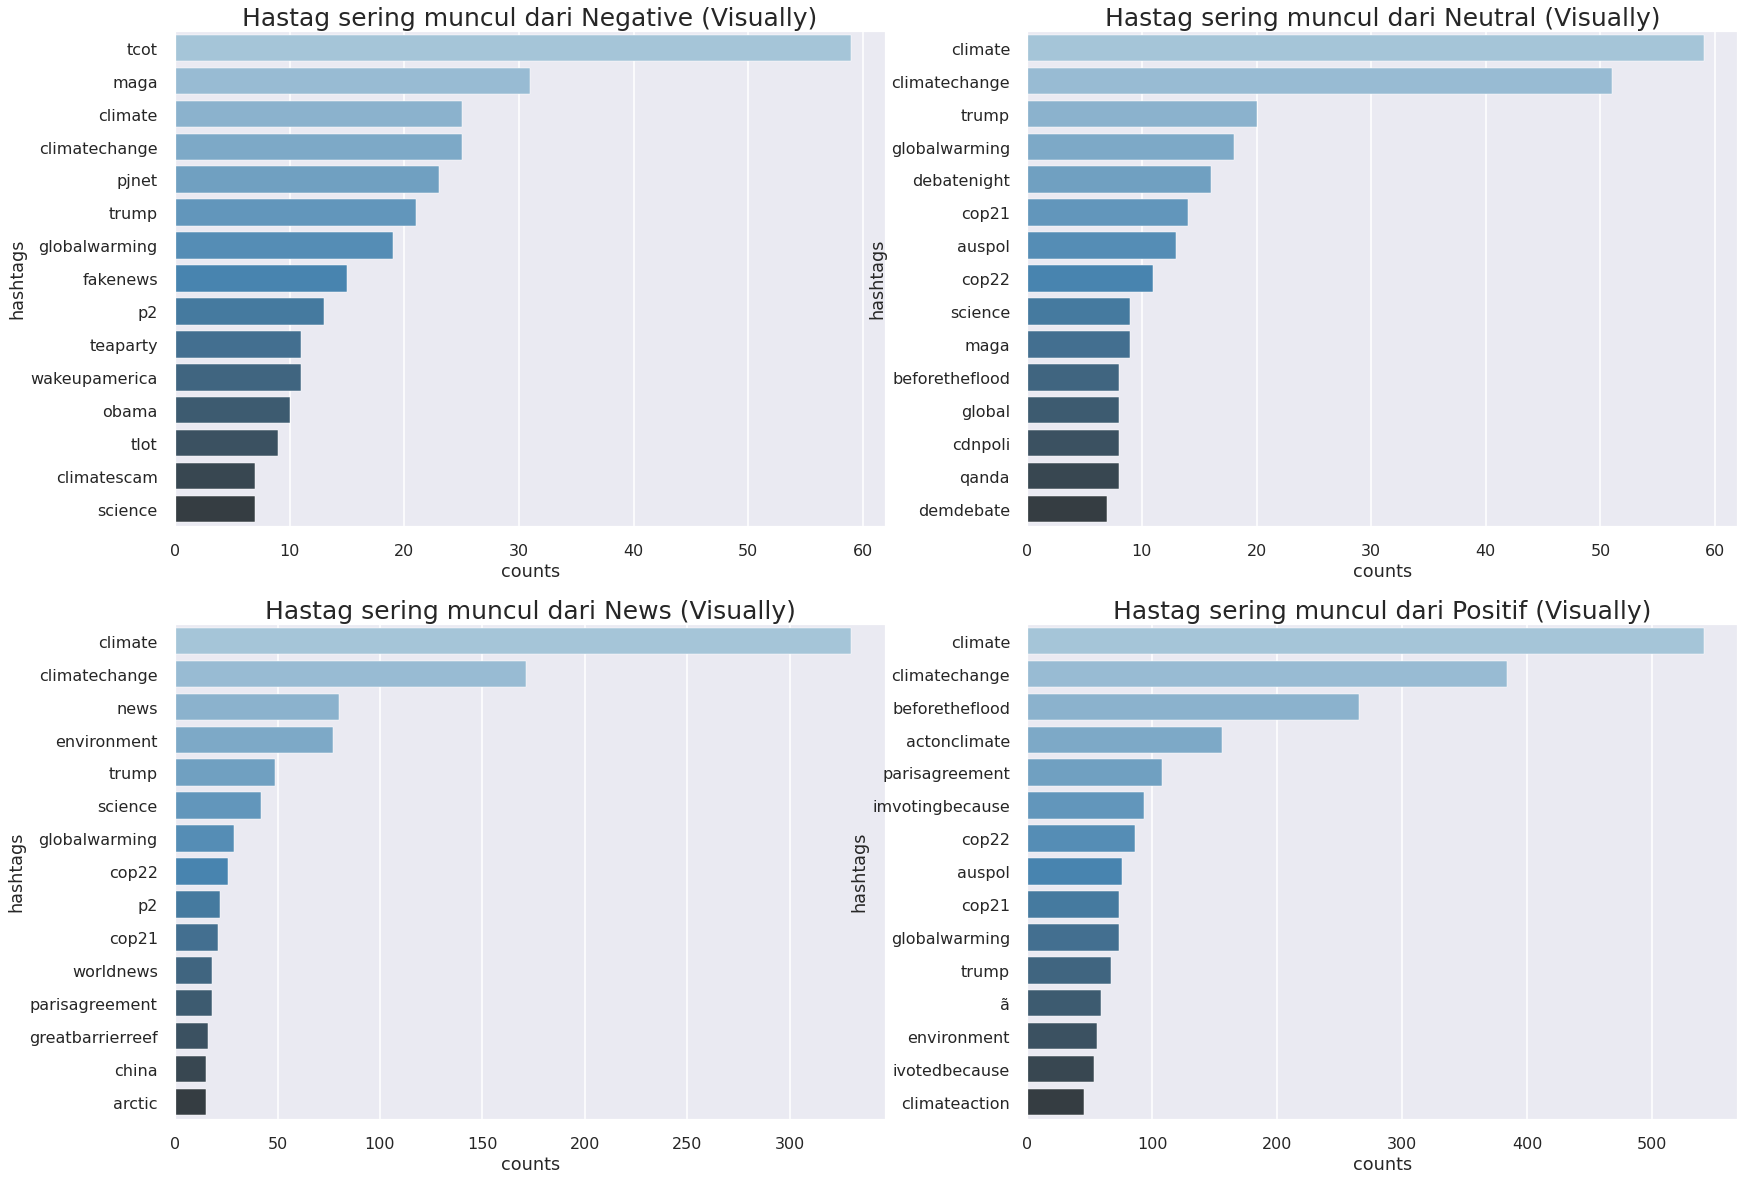

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(28, 20))
counter = 0

for sentiment, top in top15.items():
    sns.barplot(data=top, y="hashtags", x="counts", palette="Blues_d", ax=axes[counter // 2, counter % 2])
    axes[counter // 2, counter % 2].set_title(f"Hastag sering muncul dari {sentiment} (Visually)", fontsize=25)
    counter += 1
plt.show()

**Hasil Observasi**

* Hastag yang paling populer secara umum adalah iklim dan perubahan iklim. seperti tujuan kita untuk mengetahui perubahan iklim pada topik bahasan kita; Namun, di antara 3 teratas terkait ada trump dan campaign slogan.

* Tagar BeforeTheFlood mengacu pada film dokumenter tahun 2016 di mana Leonardo DiCaprio bertemu dengan ilmuwan, aktivis, dan pemimpin dunia untuk membahas bahaya iklim dan solusi dalam mengatasi masalah tersebut.

* COP22, Perjanjian Paris, dan Trump dalam sentimen Positif. Dalam konteks tersebut kemungkinan terkait dengan proses formal administrasi Trump mulai keluar dari Perjanjian Paris, di mana 200 negara bagian utara berjanji untuk mengurangi emisi gas jam hijau, membantu negara berkembang, dan membantu negara miskin yang berjuang akibat pemanasan bumi.

* Menariknya, auspol (Australian Politics) masuk dalam daftar sentimen Positif. Hal ini kemungkinan besar disebabkan oleh penilaian yang diterbitkan yang mengukur peran perubahan iklim dalam *Australian brushfires* dan terjadinya peningkatan risiko.

In [ ]:
# Proses Regular Expresion
def cleaner(tweet):
    tweet = tweet.lower()

    to_del = [
        r"@[\w]*",  # strip account mentions
        r"http(s?):\/\/.*\/\w*",  # strip URLs
        r"#\w*",  # strip hashtags
        r"\d+",  # delete numeric values
        r"U+FFFD",  # remove the "character note present" diamond
    ]
    for key in to_del:
        tweet = re.sub(key, "", tweet)

    # strip punctuation and special characters
    tweet = re.sub(r"[,.;':@#?!\&/$]+\ *", " ", tweet)
    # strip excess white-space
    tweet = re.sub(r"\s\s+", " ", tweet)

    return tweet.lstrip(" ")

In [ ]:
tweet["message"] = tweet["message"].apply(cleaner)
tweet.head()

,sentiment,message,tweetid
0,Negative,climate change is an interesting hustle as it ...,792927353886371840
1,Positif,rt watch right here as travels the world to ta...,793124211518832641
2,Positif,fabulous leonardo s film on change is brillian...,793124402388832256
3,Positif,rt just watched this amazing documentary by le...,793124635873275904
4,News,rt pranita biswasi a lutheran from odisha give...,793125156185137153


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
def lemmatizer(df):
    df["length"] = df["message"].str.len()
    df["tokenized"] = df["message"].apply(word_tokenize)
    df["parts-of-speech"] = df["tokenized"].apply(nltk.tag.pos_tag)

    def str2wordnet(tag):
        conversion = {"J": wordnet.ADJ, "V": wordnet.VERB, "N": wordnet.NOUN, "R": wordnet.ADV}
        try:
            return conversion[tag[0].upper()]
        except KeyError:
            return wordnet.NOUN

    wnl = WordNetLemmatizer()
    df["parts-of-speech"] = df["parts-of-speech"].apply(
        lambda tokens: [(word, str2wordnet(tag)) for word, tag in tokens]
    )
    df["lemmatized"] = df["parts-of-speech"].apply(
        lambda tokens: [wnl.lemmatize(word, tag) for word, tag in tokens]
    )
    df["lemmatized"] = df["lemmatized"].apply(lambda tokens: " ".join(map(str, tokens)))

    return df

In [ ]:
eda = lemmatizer(tweet)
eda.head()

,sentiment,message,tweetid,length,tokenized,parts-of-speech,lemmatized
0,Negative,climate change is an interesting hustle as it ...,792927353886371840,122,"[climate, change, is, an, interesting, hustle,...","[(climate, n), (change, n), (is, v), (an, n), ...",climate change be an interesting hustle a it b...
1,Positif,rt watch right here as travels the world to ta...,793124211518832641,76,"[rt, watch, right, here, as, travels, the, wor...","[(rt, n), (watch, n), (right, r), (here, r), (...",rt watch right here a travel the world to tack...
2,Positif,fabulous leonardo s film on change is brillian...,793124402388832256,61,"[fabulous, leonardo, s, film, on, change, is, ...","[(fabulous, a), (leonardo, n), (s, n), (film, ...",fabulous leonardo s film on change be brillian...
3,Positif,rt just watched this amazing documentary by le...,793124635873275904,104,"[rt, just, watched, this, amazing, documentary...","[(rt, n), (just, r), (watched, v), (this, n), ...",rt just watch this amazing documentary by leon...
4,News,rt pranita biswasi a lutheran from odisha give...,793125156185137153,125,"[rt, pranita, biswasi, a, lutheran, from, odis...","[(rt, n), (pranita, n), (biswasi, v), (a, n), ...",rt pranita biswasi a lutheran from odisha give...


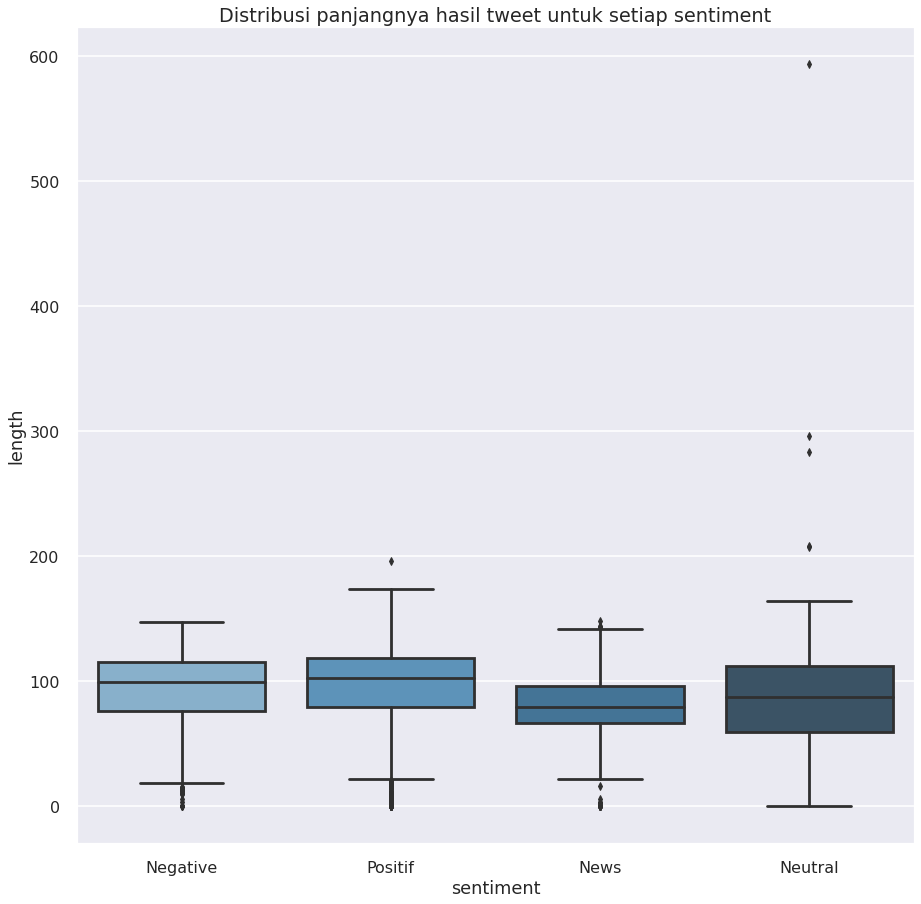

In [ ]:
plt.figure(figsize=(15, 15))
sns.boxplot(x="sentiment", y="length", data=eda, palette=("Blues_d"))
plt.title("Distribusi panjangnya hasil tweet untuk setiap sentiment")
plt.show()

**Kata kunci**

---



---



Di bawah ini, Kita akan menghitung frekuensi kata untuk setiap sentimen. Setelah itu, Kita akan membangun WordClouds untuk memvisualisasikan kata-kata.

WordCloud menyampaikan pentingnya melalui opasitas, jadi semakin transparan sebuah kata, semakin jarang kata itu muncul.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
frequency = {}

by_sentiment = eda.groupby("sentiment")
for sentiment, group in tqdm(by_sentiment):
    cv = CountVectorizer(stop_words="english")
    words = cv.fit_transform(group["lemmatized"])

    n_words = words.sum(axis=0)
    word_freq = [(word, n_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

    freq = pd.DataFrame(word_freq, columns=["word", "freq"])

    frequency[sentiment] = freq.head(n=25)

to_view = pd.concat(frequency, axis=1).head(n=25)
display(to_view)

100%|██████████| 4/4 [00:00<00:00,  5.62it/s]


Negative        Neutral             News          Positif       
         word  freq     word  freq       word  freq       word   freq
0     climate  2368  climate  4579     change  8172     change  19350
1      change  2285   change  4572    climate  8077    climate  19234
2          rt  2069       rt  3493         rt  5076         rt  14666
3      global  1964   global  3231      trump  2003     global   4286
4     warming  1497  warming  2600     global  1411    warming   3141
5        warm   406     warm   572        say   947      trump   2245
6        make   254      say   519    warming   912    believe   2151
7         amp   228    trump   469        new   573        amp   1692
8         say   224      amp   353  scientist   556      think   1620
9         man   222     like   329        epa   545      doesn   1303
10      cause   211    think   324      fight   476       real   1303
11       just   207    cause   318      study   415      world   1155
12       year   200     real   294      world   360     people   1143
13    science   189     just   289      obama   338        say   1139
14  scientist   186  believe   285       warm   329      fight   1108
15      obama   186     make   243      china   314       http    940
16    believe   177     talk   228      paris   312       just    934
17       hoax   172      don   218     report   295       warm    881
18     people   168   people   204       plan   282       make    873
19       real   167       ðÿ   195     donald   279        don    838
20    liberal   158     http   189       news   274     denier    831
21      trump   152     know   188     pruitt   253       need    829
22    weather   141      new   164  president   233       like    801
23       like   139    world   161     energy   232  president    778
24      think   135     tell   159      scott   228        die    752

Setelah kita menghitung frekuensinya, mari kita buat dan plotkan pada WordClouds untuk setiap sentimen.

100%|██████████| 4/4 [00:00<00:00,  7.47it/s]


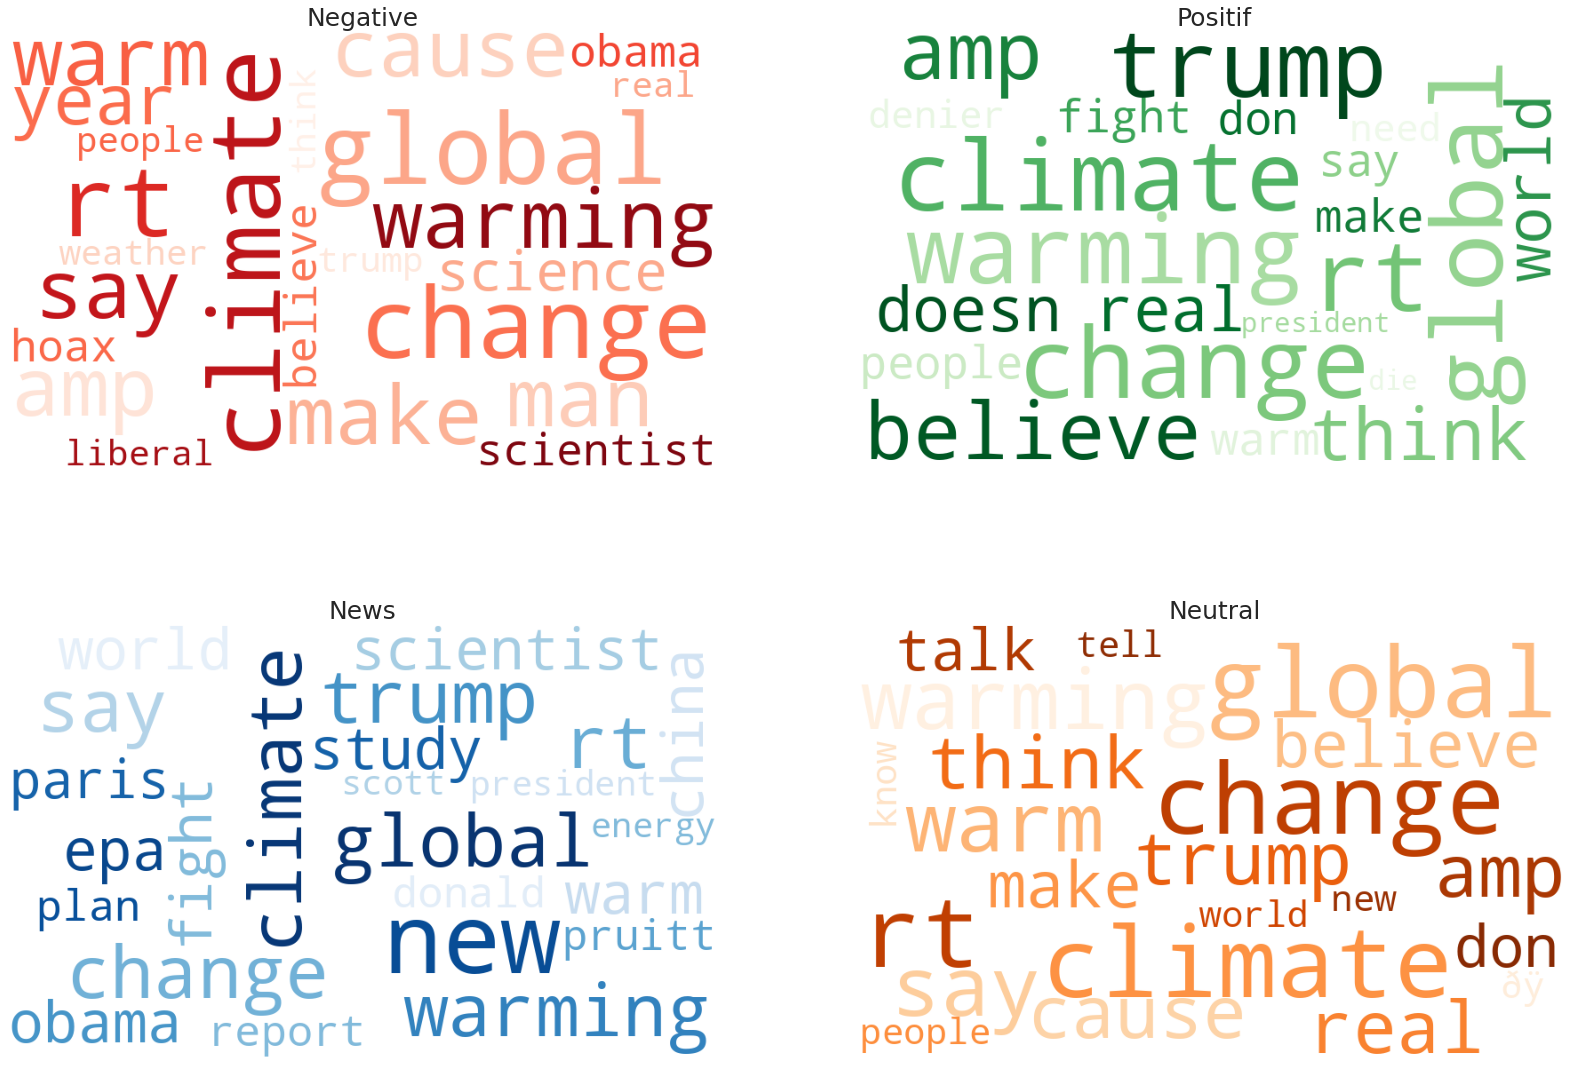

In [ ]:
words = {sentiment: " ".join(frequency[sentiment]["word"].values) for sentiment in sentiment_num2name.values()}

cmaps = {
    "Negative": ("Reds", 110),
    "Positif" : ("Greens", 73),
    "News": ("Blues", 0),
    "Neutral": ("Oranges", 10),
}

from wordcloud import WordCloud

wordclouds = {}
for sentiment, (cmap, rand) in tqdm(cmaps.items()):
    wordclouds[sentiment] = WordCloud(
        width=800, height=500, random_state=rand,
        max_font_size=110, background_color="white",
        colormap=cmap
    ).generate(words[sentiment])

fig, axes = plt.subplots(2, 2, figsize=(28, 20))
counter = 0

for sentiment, wordcloud in wordclouds.items():
    axes[counter // 2, counter % 2].imshow(wordcloud)
    axes[counter // 2, counter % 2].set_title(sentiment, fontsize=25)
    counter += 1

for ax in fig.axes:
    plt.sca(ax)
    plt.axis("off")


plt.show()

**Hasil Pengamatan:**

* 3 kata kunci teratas adalah iklim, perubahan, dan rt (retweet). Ini tampaknya menunjukkan bahwa banyak informasi yang sama dibagikan/dilihat oleh pengguna. Ini berlaku untuk semua sentimen. Meskipun kami tidak dapat menyimpulkan bahwa itu adalah hasil dari "Filter Bubble", tampaknya hal itu mungkin merupakan penyebab laten (tersembunyi).

* Menariknya, trump terjadi di semua kasus. Ini mungkin tidak mengejutkan, mengingat masa kepresidenannya dan banyak jejak tweet yang didapat mengenai dirinya. Ini adalah sesuatu yang mungkin memerlukan penyelidikan lebih lanjut terutama di sepanjang sumbu Netral dan Positif.

* Kata-kata seperti real, believe, think, dan fight cukup sering muncul dalam sentimen Positif. Menariknya, sentimen Positif dan Negatif tampaknya mengatakan sains dan ilmuwan, yang tampaknya menunjukkan bahwa kedua belah pihak percaya bahwa kutipan mereka akurat, direproduksi, dan masuk kedalam sebuah penelitian.

* Lihat tabel di atas, Anda akan melihat bahwa http sebenarnya cukup sering muncul di sentimen Positif. Ini berarti bahwa tautan cukup sering dibagikan bersama Tweet. Bandingkan dengan sentimen yang lain khususnya, Berita. Mengapa demikian?

**Beberapa Ekstraksi Entitas Mentah**

Jadi, ini adalah seluruh bidang NLP – ekstraksi entitas. Kami akan menggunakan library spacy, perpustakaan NLP yang cukup bagus. beerapa entitas yang akan kita ekstraksi fiturnya adalah:

- Rakyat (People)
- Kawasan Geopolitik (Geopolitical Regions)
- Organisasi (Organization)

Khusus untuk kumpulan data diatas, karena beberapa faktor yang mungkin ada hubungan sebab akibat di antara mereka. Yang penting, ini mungkin tidak memberi tahu kita bagaimana para Tweeter ini akan mendapatkan spektrum(keadaan) dukungan, tetapi ini dapat memberi tahu kita organisasi, wilayah geopolitik, dan pemberi pengaruh/orang yang paling terfokus dalam mengadvokasi/melawan "Perubahan Iklim yang Didorong Manusia".

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!python -m spacy download en

2023-03-17 02:20:40.458290: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-17 02:20:41.355428: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-17 02:20:41.355544: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-17 02:20:41.355566: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [ ]:
!python -m spacy download en_core_web_sm

2023-03-17 02:20:57.986077: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-17 02:20:59.067358: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-17 02:20:59.067493: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-17 02:20:59.067515: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [ ]:
!python -m spacy info

2023-03-17 02:21:13.433230: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-17 02:21:14.368144: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-17 02:21:14.368254: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-17 02:21:14.368274: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [ ]:
import spacy
from spacy.cli.download import download
download(model="en_core_web_sm")
spacy_en = spacy.blank('en')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
def crude_entities(tweet):
    as_words = tweet.apply(spacy_en)

    def by_label(words, label):
        filtered = [word.text for word in words.ents if word.label_ == label]
        return filtered

    def get_top(label, n=10):
        thing = as_words.apply(lambda x: by_label(x, label))
        flattened = itertools.chain(*thing.values)

        counter = Counter(flattened)
        topN = counter.most_common(n)

        topN_things = [thing for thing, _ in topN]

        return thing

    entities = pd.DataFrame()
    entities["people"] = get_top("PERSON", n=10)
    entities["geopolitics"] = get_top("GPE", n=10)
    entities["organizations"] = get_top("ORG")

    return entities

In [ ]:
from collections import Counter

In [ ]:
entities = {}

by_sentiment = eda.groupby("sentiment")

for sentiment, group in tqdm(by_sentiment):
    entities[sentiment] = crude_entities(group["lemmatized"])

display(pd.concat(entities, axis=1).head(n=10))

100%|██████████| 4/4 [00:04<00:00,  1.22s/it]


Negative                           Neutral                            \
      people geopolitics organizations  people geopolitics organizations   
0         []          []            []     NaN         NaN           NaN   
20        []          []            []     NaN         NaN           NaN   
125       []          []            []     NaN         NaN           NaN   
286       []          []            []     NaN         NaN           NaN   
337       []          []            []     NaN         NaN           NaN   
361       []          []            []     NaN         NaN           NaN   
397       []          []            []     NaN         NaN           NaN   
485       []          []            []     NaN         NaN           NaN   
542       []          []            []     NaN         NaN           NaN   
592       []          []            []     NaN         NaN           NaN   

      News                           Positif                            
    people geopolitics organizations  people geopolitics organizations  
0      NaN         NaN           NaN     NaN         NaN           NaN  
20     NaN         NaN           NaN     NaN         NaN           NaN  
125    NaN         NaN           NaN     NaN         NaN           NaN  
286    NaN         NaN           NaN     NaN         NaN           NaN  
337    NaN         NaN           NaN     NaN         NaN           NaN  
361    NaN         NaN           NaN     NaN         NaN           NaN  
397    NaN         NaN           NaN     NaN         NaN           NaN  
485    NaN         NaN           NaN     NaN         NaN           NaN  
542    NaN         NaN           NaN     NaN         NaN           NaN  
592    NaN         NaN           NaN     NaN         NaN           NaN

# **Modelling**
Saatnya membangun pengklasifikasian sentimen kita!
Kita akan melakukan proses "vectorizing" pada data teks sebelum membuat sebuah model. Kita perlu vectorizer data kita untuk mengkonvert kedalam format ASCII dan Unicode. Mesin tidak mengerti huruf dan kata, tetapi nilai numerik adalah bahasa yang dapat dipahami oleh sebuah mesin.

Algoritma yang dipakai :

* Random Forests
- Naïve Bayes
- K-Nearest Neighbors
- Logistic Regression
- Support Vector Machines (Linear SVC)

In [ ]:
# Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Building classification models
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Model evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

Kita akan membagi dataset menjadi Training data dan Test Data

In [ ]:
X_all = tweet["message"]
y_all = tweet["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.25, random_state=1337)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=1337)

#**TF-IDF**
Apa itu TFIDF?

Pada dasarnya, ini memberikan skor frekuensi kata. Skor ini mencoba menyoroti kata-kata mengandung nilai yang unik(nilai yg berbeda pada kata 1 dengan kata lainnya). Kita dapat mengetahui dengan melihat frekuensi dalam dokumen vs frekuensi kemunculan kata pada sebuah dokumen. TFIDFVectorizer akan menandai dokumen, mempelajari kosakata dan "membalikkan bobot frekuensi dokumen", dan memungkinkan Anda meng-encode(menjadikan vektor pada setiap kemunculan kata) sebuah dokumen.

In [ ]:
tfidf = TfidfVectorizer()
tfidf.fit_transform(X_train)

<24717x20425 sparse matrix of type '<class 'numpy.float64'>'
	with 357402 stored elements in Compressed Sparse Row format>

functions *train, grade, and train_and_grade* akan mempermudah kita dalam meminimalisir penulisan code program pada cell kita. istilah ini disebut dengan DRY (Don't Repeat Yourself)

In [ ]:
def train(tfidf, model, train_data, train_labels, test_data):
    model.fit(tfidf.transform(train_data), train_labels)
    preds = model.predict(tfidf.transform(test_data))

    return preds

In [ ]:
def grade(model, preds, test_labels):
    print(metrics.classification_report(test_labels, preds))

    cm = confusion_matrix(test_labels, preds)
    cm_normd = cm / cm.sum(axis=1).reshape(-1, 1)

    heatmap_kwargs = dict(
        cmap="YlGnBu",
        xticklabels=model.classes_,
        yticklabels=model.classes_,
        vmin=0.,
        vmax=1.,
        annot=True,
        annot_kws={"size": 10},
    )

    sns.heatmap(cm_normd, **heatmap_kwargs)

    plt.title(f"{model.__class__.__name__} Classification")
    plt.ylabel("Ground-truth labels")
    plt.xlabel("Predicted labels")
    plt.plot()

In [ ]:
def train_and_grade(tfidf, model, train_data, train_labels, test_data, test_labels):
    preds = train(tfidf, model, train_data, train_labels, test_data)
    grade(model, preds, test_labels)

# **1. Random Forest/Decision Tree**


**Random Forest** adalah algoritma Pembelajaran Mesin berbasis pohon yang memanfaatkan beberapa Pohon Keputusan. Pohon keputusan pada dasarnya bekerja seperti alur kontrol if-elif-else, tetapi metrik untuk setiap batas keputusan adalah "pengumpulan informasi". contoh, Komponen Hutan yang tidak subur, Kita mengambil banyak Pohon Keputusan dan "menanamnya bersama" untuk proses penghijauan kembali.

Representasi visual dari Random Forest:

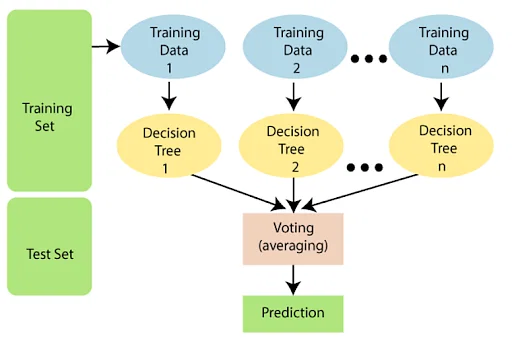


[src img](https://www.simplilearn.com/ice9/free_resources_article_thumb/Working_of_RF_1.png)




/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       787
     Neutral       0.00      0.00      0.00      1420
        News       0.00      0.00      0.00      1732
     Positif       0.52      1.00      0.69      4301

    accuracy                           0.52      8240
   macro avg       0.13      0.25      0.17      8240
weighted avg       0.27      0.52      0.36      8240



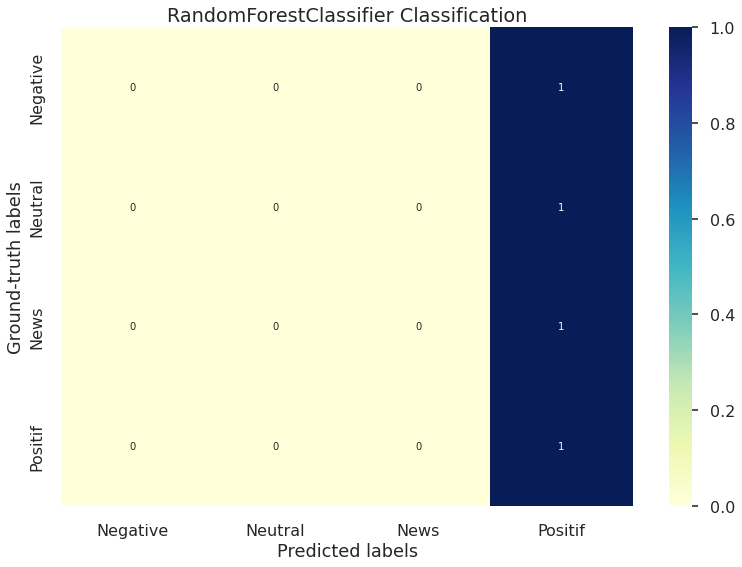

In [ ]:
rf = RandomForestClassifier(max_depth=5, n_estimators=100)
n = plt.figure()
train_and_grade(tfidf, rf, X_train, y_train, X_valid, y_valid)
n.savefig("img.png")

**Hasil:**

- Dari *Confusion Matriks* di atas, kita dapat melihat bahwa model tersebut menghasilkan hasil prediksi sentimen Positif. Ini mungkin karena keseimbangan data.

- Melihat Skor Presisi/Recall/F1, untuk sentimen Negative, Netral, dan News, Kita melihat semuanya 0.

- Metode berbasis pohon rentan terhadap overfitting pada data yang tidak seimbang, seperti yang kita miliki. Namun, kami berpotensi mengambil sampel ulang sehingga data pelatihan memiliki penyebaran yang lebih seragam dari setiap sentimen untuk menguji apakah itu benar-benar masalah dengan RandomForestClassifier yang sudah kita coba.

- Skor keseluruhan F1 kita adalah 0,52%.

# **2. Naive Bayes**

**Naive bayes** merupakan metode pengklasifikasian paling populer digunakan dengan tingkat keakuratan yang baik. Banyak penelitian tentang pengklasifikasian yang telah dilakukan dengan menggunakan algoritma ini. Berbeda dengan metode pengklasifikasian dengan logistic regression ordinal maupun nominal, pada algoritma naive bayes pengklasifikasian tidak membutuhkan adanya pemodelan maupun uji statistik.

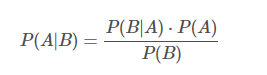

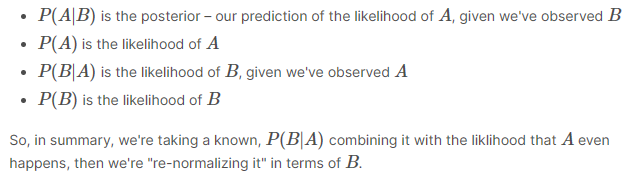



Mari kita uraikan ini:

- P(A|B)
   adalah posterior(nilai yang telah diperbaharui) – prediksi tentang kemungkinan A
  , dari kemungkinan B yang telah dianalisa/amati

- P(A)
   adalah kemungkinan A

- P(B|A)
   adalah kemungkinan B
  , dari kemungkinan A yang telah dianalisa/amati

- P(B)
   adalah kemungkinan B

Jadi secara ringkas, mengambil nilai yang diketahui, P(B|A)
   menggabungkannya kemungkinan yang terjadi pada nilai A, kemudian "menormalkannya kembali" dalam nilai B.

Algoritma ini memiliki beberapa tipe antara lain sebagai berikut:

- Bernoulli Naive Bayes

> Dimana prediktornya adalah variabel boolean. Oleh karena itu satu-satunya yang ada hanya benar atau salah. Biasanya algoritma ini digunakan ketika data sesuai dengan distribusi bernoulli multivariat.


- Naive Bayes Multinomial

> Dimana algoritma ini sering digunakan untuk memecahkan masalah klasifikasi dokumen. Contohnya, jika ingin menentukan apakah suatu dokumen termasuk dalam suatu kategori dan algoritma ini digunakan untuk memilahnya. Naive bayes menggunakan frekuensi kata-kata sekarang sebagai fitur.



- Gaussian Naive Bayes

> Digunakan jika prediktor tidak diskrit namun memiliki nilai kontinu dan prediktor tersebut diasumsikan sebagai sampel dari distribusi gaussian.

              precision    recall  f1-score   support

    Negative       0.91      0.03      0.05       787
     Neutral       0.88      0.07      0.13      1420
        News       0.87      0.36      0.51      1732
     Positif       0.58      0.99      0.73      4301

    accuracy                           0.61      8240
   macro avg       0.81      0.36      0.36      8240
weighted avg       0.72      0.61      0.52      8240



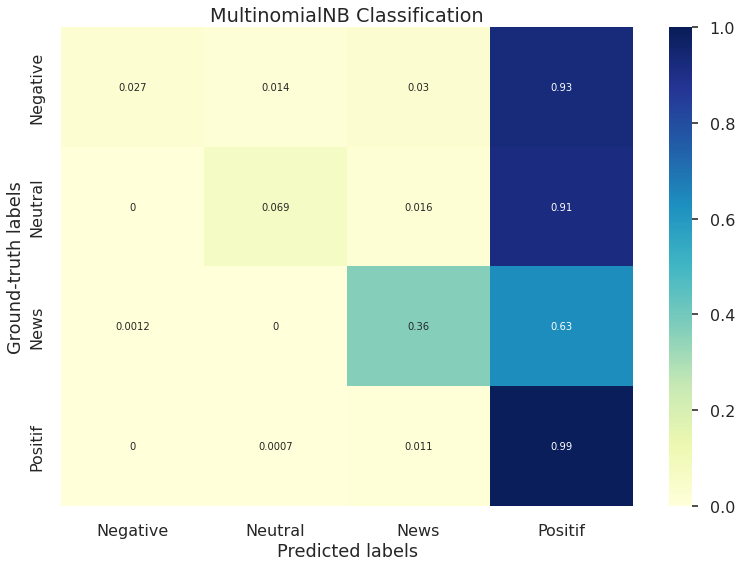

In [ ]:
nb = MultinomialNB()
train_and_grade(tfidf, nb, X_train, y_train, X_valid, y_valid)


**Hasil:**

- Berbeda dengan Random Forest, pada Naive Bayes ini ada peningkatan f1 score sebesar 0.61% tetapi kinerjanya masih sangat buruk.

- bisa kita lihat, hasil diatas masih mengklasifikasikan sebagian besar Tweet dengan sentimen Positif.

- Hasil Presisi, Akurasi, dan F1-Score, telah meningkat secara signifikan di seluruh sentimen lainnya.

- Meskipun Naïve Bayes berkinerja lebih baik, kinerjanya masih kurang baik karena terpengaruhi oleh keseimbangan data.

In [ ]:
import pickle
# Save the vectorizer
vec_file = 'vectNB.pkl'
pickle.dump(tfidf, open(vec_file, 'wb'))

# Save model for prediction new data
pickle.dump(nb,open("modelNB.pkl","wb"))

# **3. K-Nearest Neighbors**

KNN menggunakan "feature similarity" untuk memprediksi nilai titik data baru. Pada dasarnya, ini melihat K titik terdekat dari titik data yang diberikan, dan menghitung kemiripan di antara keduanya.

Kita dapat menghitung kesamaan dengan berbagai ukuran, misalnya Jarak Euclidean, Manhattan (baik untuk Berkelanjutan), dan Hamming (baik untuk Kategorial).

              precision    recall  f1-score   support

    Negative       0.74      0.09      0.16       787
     Neutral       0.21      0.97      0.34      1420
        News       0.83      0.28      0.42      1732
     Positif       0.92      0.19      0.31      4301

    accuracy                           0.33      8240
   macro avg       0.67      0.38      0.31      8240
weighted avg       0.76      0.33      0.32      8240



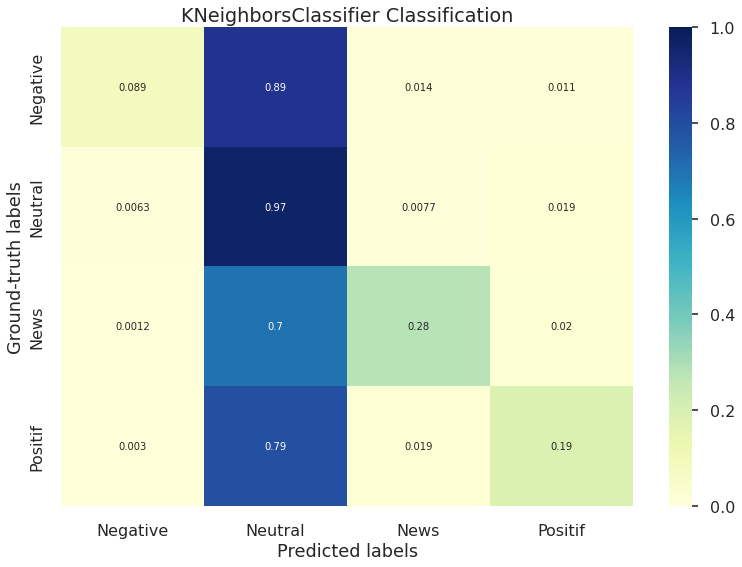

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
train_and_grade(tfidf, knn, X_train, y_train, X_valid, y_valid)

**Hasil:**

KNN meningkat dari Naïve Bayes dan Random Forests.
Tetapi hasilnya masih merujuk pada nilai sentimen positif, tetapi kita akan melihat bahwa itu sebenarnya memiliki keragaman yang lebih besar dalam klasifikasi ini secara keseluruhan.

# **4. Multinomial Logistic Regression (Classification)**

Multinomial Logistic Regression merupakan generalisasi dari Logistic Regression, sehingga dapat menangani multiple class. Biasanya Regresi Logistik bekerja dengan baik ketika Anda memisahkan kelas yang dipermasalahkan secara linear. Seperti Naïve Bayes dan Random Forests, ini sangat sensitif terhadap keseimbangan kelas.

              precision    recall  f1-score   support

    Negative       0.47      0.61      0.53       787
     Neutral       0.48      0.57      0.52      1420
        News       0.67      0.81      0.74      1732
     Positif       0.84      0.67      0.75      4301

    accuracy                           0.68      8240
   macro avg       0.62      0.67      0.63      8240
weighted avg       0.71      0.68      0.69      8240



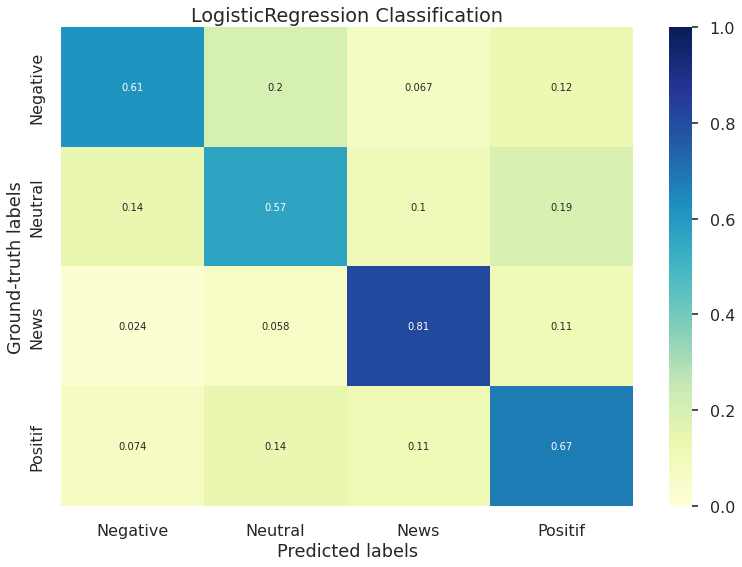

In [ ]:
logreg = LogisticRegression(C=1, class_weight="balanced", max_iter=1000)
train_and_grade(tfidf, logreg, X_train, y_train, X_valid, y_valid)

**Hasil**

- Regresi Logistik berjalan cukup baik, terutama dibandingkan dengan model sebelumnya.

- Skor Precision, Recall, dan F1 dari semua kelas non-Pro masih cenderung naik, itu bagus.

# **5. Support Vector Machines (Linear SVC)**

Dengan SVM kami memplot data kami dalam ruang n-dimensi ( n adalah jumlah fitur) sehingga setiap fitur dibuat sebagai koordinat pada sumbu. Tujuan SVM untuk membuat batas keputusan terbaik antara semua fitur (ini menjadi sulit untuk divisualisasikan melewati n=3). Batas keputusan ini juga disebut hyperplane.

SVM biasanya menggunakan titik/vektor ekstrem untuk membantu pembuatan Hyperplane. Vektor ini disebut "Support Vectors".

Perhatikan gambar di bawah untuk mengetahui apa yang terjadi.

              precision    recall  f1-score   support

    Negative       0.53      0.55      0.54       787
     Neutral       0.52      0.50      0.51      1420
        News       0.71      0.77      0.73      1732
     Positif       0.79      0.77      0.78      4301

    accuracy                           0.70      8240
   macro avg       0.64      0.65      0.64      8240
weighted avg       0.70      0.70      0.70      8240



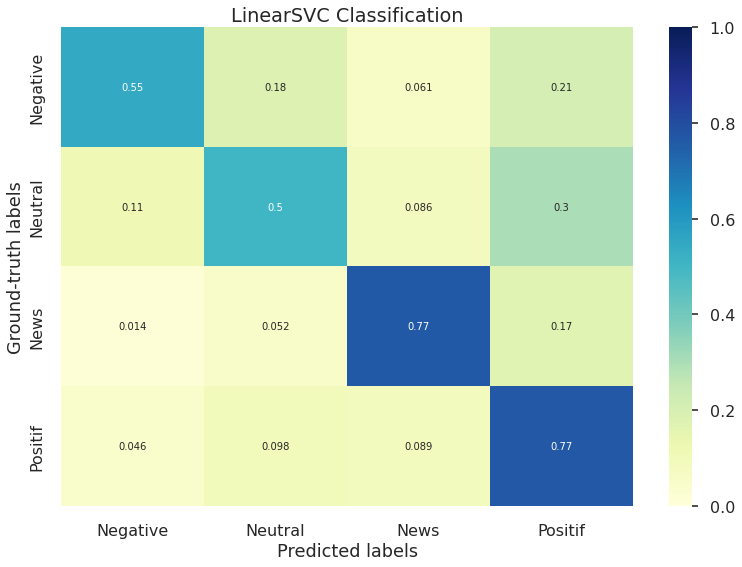

In [ ]:
svm_lsvc = LinearSVC(class_weight="balanced")
train_and_grade(tfidf, svm_lsvc, X_train, y_train, X_valid, y_valid)

**Hasil**

- SVM cukup berhasil mengklasifikasikan Tweet.

- Berdasarkan Confusion Matriks di atas, Anda dapat melihat ada batasan yang cukup jelas di semua sentimen.

- Menariknya, SVM tampaknya ada ketidak jelasan tentang apa yang harus diklasifikasikan sebagai Positif daripada Regresi Logistik.

- Pertukaran dari mengklasifikasikan tweet Positif, masih mengarah pada keuntungan dalam mengklasifikasikan sebagian besar data kami dengan benar.

In [ ]:
# Save the vectorizer
vec_file = 'vectsvm.pkl'
pickle.dump(tfidf, open(vec_file, 'wb'))

# Save model for prediction new data
pickle.dump(svm_lsvc,open("modelsvm.pkl","wb"))

In [ ]:
def identitas(nama, usia, gender, alamat):
  print("Nama Lengkap\t : ", nama)
  print("Usia saat ini\t : ", usia)
  print("Jenis Kelamin\t : ", gender)
  print("Alamat Lengkap\t : ", alamat)

identitas(usia=23,nama="Rendyca",alamat="Jakarta",gender="Laki-laki")
# Passing Information
# Function

Nama Lengkap	 :  Rendyca
Usia saat ini	 :  23
Jenis Kelamin	 :  Laki-laki
Alamat Lengkap	 :  Jakarta


In [ ]:
# Global Scope

nilai = 100

def cetak():
  print(nilai + 50)

cetak()

150


In [ ]:
from pandas._libs.hashtable import value_count
# Local Scope
def score():
  global value
  value = 100

score()
print(value)

100


In [ ]:
def luas_lingkaran():

  jari_jari = 14

  luas = 3.14*jari_jari**2

  print("Luas Lingkarannya adalah : ", luas)

  return luas

hasil = luas_lingkaran()
print(hasil)

Luas Lingkarannya adalah :  615.44
615.44


In [ ]:
luas_lingkaran()

Luas Lingkarannya adalah :  615.44


In [ ]:
import calendar
yy =2023
mm = 6
print(calendar.month(yy,mm))

     June 2023
Mo Tu We Th Fr Sa Su
          1  2  3  4
 5  6  7  8  9 10 11
12 13 14 15 16 17 18
19 20 21 22 23 24 25
26 27 28 29 30



In [ ]:
print("Calender tahun 2023: ")
print(calendar.calendar(2024))

Calender tahun 2023: 
                                  2024

      January                   February                   March
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
 1  2  3  4  5  6  7                1  2  3  4                   1  2  3
 8  9 10 11 12 13 14       5  6  7  8  9 10 11       4  5  6  7  8  9 10
15 16 17 18 19 20 21      12 13 14 15 16 17 18      11 12 13 14 15 16 17
22 23 24 25 26 27 28      19 20 21 22 23 24 25      18 19 20 21 22 23 24
29 30 31                  26 27 28 29               25 26 27 28 29 30 31

       April                      May                       June
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
 1  2  3  4  5  6  7             1  2  3  4  5                      1  2
 8  9 10 11 12 13 14       6  7  8  9 10 11 12       3  4  5  6  7  8  9
15 16 17 18 19 20 21      13 14 15 16 17 18 19      10 11 12 13 14 15 16
22 23 24 25 26 27 28      20 21 22 23 24 25 26      17 18 19 20 21 22 23
29 3